In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f

Suma total de todos los datos

$$ X = \sum_{i=1}^{k} \sum_{j=1}^{n} x_{ij} $$

Factor de Corrección ($N$ total de datos)

$$  F_{c} = \frac{X^{2}}{N} $$

Suma de cuadrados totales

$$ SCT = \sum_{i=1}^{k} \sum_{j=1}^{n} x_{ij}^{2} - Fc  $$

Suma cuadrados dividido el número de observacion de cada experimentos

$$ SC = \sum_{i=1}^{k} \frac{X_{i}^{2}}{n_{i}} - Fc$$

Suma cuadrados  del error

$$ SCE = SCT - SC $$

Experimento tiene $k-1$ grados de libertad, los cuadrados medios son:

$$ CM = SC/(k-1)  $$

Los cuadrados medios tienen $n-k$ grados de libertad, el errores de los cuadrados medios son:

$$ CME = SCE/(n-k)  $$

El estadistico de prueba sigue una distribución F Fisher

$$ F = \frac{CM}{CME} $$

In [5]:
dfn, dfd = 2,12
x = np.linspace(0,5,20)
y = f.pdf(x,dfn,dfd)

In [8]:
FCritica = f.ppf(0.95,dfn,dfd) #valor dominio en cual la probabildiad es 95% ppf y cuando quiero ver el valor cdf
FCritica

3.8852938346523933

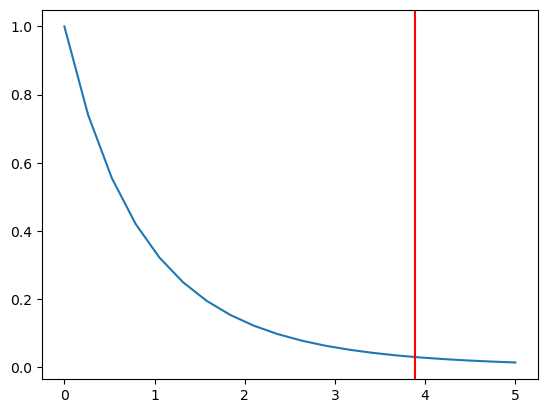

In [10]:
plt.plot(x,y)
plt.axvline(x=FCritica,color='r')
# si los valores dan mas de 3.8 rechazamos la hipotesis o independencia

Supongamos que 3 formulas de secado de semento se estudian una construccion, pruebe si existe una diferencia significativa de las 3 formulas usando los sgtes datos
¿Los tiempos de curado EN PROMEDIO son iguales?

In [11]:
x = np.array([13,11,8,11,8])
y = np.array([13,11,14,14,10])
z = np.array([4,1,3,4,2])

In [16]:
df = pd.DataFrame ({'x':x,'y':y,'z':z})

In [17]:
df

,x,y,z
0,13,13,4
1,11,11,1
2,8,14,3
3,11,14,4
4,8,10,2


In [19]:
#Como hacer el analisis de ANOVA para la medias de tiempos de curado
N=df.shape[0]*df.shape[1]
N

15

In [24]:
subtotal = np.sum( df , axis = 0 ) 
Total = np.sum(subtotal)
Total

127

In [25]:
#Factor de correccion
Fc = Total**2/N

In [23]:
Fc

1075.2666666666667

In [27]:
SCT = np.sum(df.x**2 +df.y**2 +df.z**2 )

In [28]:
SCT

1367

In [29]:
SCT = SCT - Fc

In [30]:
SCT

291.73333333333335

In [39]:
SC = np.sum( np.sum(df.x)**2/df.shape[0] + np.sum(df.y)**2/df.shape[0] + np.sum(df.z)**2/df.shape[0])

In [40]:
SC -=Fc

In [41]:
SC

252.9333333333334

In [42]:
SCE = SCT - SC

In [43]:
SCE

38.799999999999955

In [44]:
k = 3
dfn,dfd = k-1,N-k

In [45]:
dfn,dfd

(2, 12)

In [46]:
CM = SC/(k-1)

In [47]:
CM

126.4666666666667

In [48]:
CME = SCE/dfd

In [49]:
CME

3.2333333333333294

In [52]:
Fobs= CM/CME #Estimador de Fisher Observador

In [53]:
Fobs

39.11340206185573

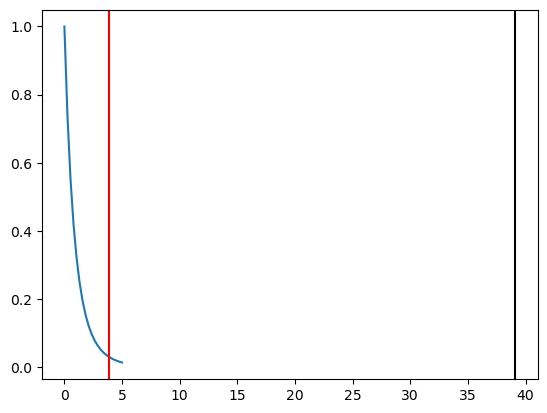

In [56]:
x = np.linspace(0,5,20)
y = f.pdf(x,dfn,dfd)
FCritica = f.ppf(0.95,dfn,dfd) #valor dominio en cual la probabildiad es 95% ppf y cuando quiero ver el valor cdf
FCritica
plt.plot(x,y)
plt.axvline(x=FCritica,color='r')
plt.axvline(x=Fobs,color='k')

In [59]:
CL  = f.cdf(Fobs,dfn,dfd)
pvalue = 1 - CL
pvalue

5.534444389110327e-06

In [61]:
from scipy.stats import stats

In [63]:
fvalue, pvalue  = stats.f_oneway(df['x'],df['y'],df['z'])

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_25952\912540756.py:1: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  fvalue, pvalue  = stats.f_oneway(df['x'],df['y'],df['z'])


In [67]:
fvalue, pvalue #si pvalue es menor al 5% rechazamos

(39.11340206185566, 5.5344443890614115e-06)

In [69]:
fvalue, pvalue  = stats.f_oneway(df['z'],df['y'])
fvalue, pvalue

C:\Users\CARLOS\AppData\Local\Temp\ipykernel_25952\154582868.py:1: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  fvalue, pvalue  = stats.f_oneway(df['z'],df['y'])


(92.16, 1.1502980007209628e-05)